# AT1 - NBA Draft - Kaggle competition - Final Notebook using custom package

# 1. Loading the dataset

## 1.1. Launch commands to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

## 1.2. Import the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3. Load the training and test dataset into a dataframes called df_train and df_test

In [3]:
df_train = pd.read_csv('../data/raw/train.csv',low_memory=False)
df_test = pd.read_csv('../data/raw/test.csv',low_memory=False)

# 2. Exploring the dataset

 ## 2.1 Install your custom package with pip

In [4]:
! pip install -i https://test.pypi.org/simple/ my_krml_pine==2024.0.1.7

Looking in indexes: https://test.pypi.org/simple/


## 2.2 import custom functions for data exploration

In [5]:
from my_krml_pine.data.dataexplorer import dataexplorer

## 2.3 Data Exploration using custom functions

In [6]:
# Create instances of DataExplorer
explorer = dataexplorer(df_train, df_test)

# Call the methods of the class to perform data exploration tasks
explorer.display_top_rows()
explorer.display_bottom_rows()
explorer.display_random_rows()
explorer.display_shape()
explorer.display_columns()
explorer.display_info()
explorer.display_descriptive_stats()
explorer.display_target_frequency('drafted', normalize=True)
explorer.display_no_of_duplicate_rows()
explorer.calculate_missing_percentage()

Top 5 rows of training data:
            team conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0  South Alabama   SB  26     29.5   97.3  16.6  42.5   44.43      1.6   
1       Utah St.  WAC  34     60.9  108.3  14.9  52.4   54.48      3.8   
2  South Florida   BE  27     72.0   96.2  21.8  45.7   47.98      2.1   
3     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   53.69      4.1   
4        Pacific   BW  33     56.2   96.5  22.0  52.8   54.31      8.3   

   DRB_per  ...     dgbpm    oreb    dreb    treb     ast     stl     blk  \
0      4.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462  0.0385   
1      6.3  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118  0.2353   
2      8.0  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815  0.0000   
3      9.4  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667  0.1333   
4     18.6  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545  0.3333   

       pts                             player_id  drafted  
0  

## 2.4 import custom functions for data visualisations

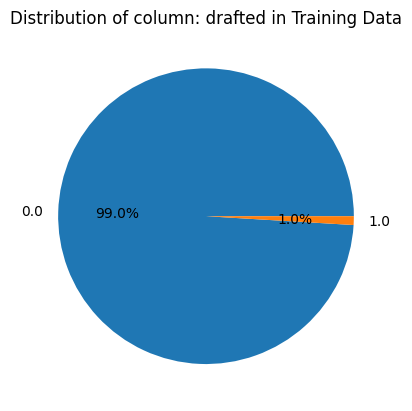

In [7]:
from my_krml_pine.data.datavisuals import draw_pie, draw_corrmatrix_numcols, draw_histogram_numcols

# 2.5 Visualise the target variable
draw_pie(df_train,'drafted','Training Data')

# 3. Data Preperation

## 3.1 Data Preprocessing of categorical varaiables

### 3.1.1 Featrure Engineering of of `ht` - player's height feature

In [8]:
# finding unique values in height of the player 'ht' column in train data
df_train['ht'].unique()

array(['2-Jun', '4-Jun', '8-Jun', '1-Jun', '5-Jun', 'Jun-00', '6-Jun',
       '9-Jun', '3-Jun', '11-Jun', '7-Jun', '10-May', '10-Jun', '11-May',
       '9-May', 'Jul-00', '7-May', '5-Jul', '8-May', '6-May', '2-Jul',
       '1-Jul', '-', '3-May', '3-Jul', 'Apr-00', '5-May', '4-Jul', nan,
       'So', 'Jr', 'Fr', "6'4", '4-May', '0', '1-May', '6-Jul', '5-Apr',
       '2-May'], dtype=object)

In [9]:
# finding unique values in height of the player 'ht' column in test data
df_test['ht'].unique()

array(['4-Jun', 'Jun-00', '9-Jun', '2-Jun', '3-Jun', '10-Jun', '1-Jun',
       '6-Jun', '5-Jun', '11-Jun', '7-Jun', '8-Jun', '11-May', '8-May',
       '1-Jul', 'Jul-00', '10-May', '3-Jul', '9-May', '2-Jul', '2-May',
       '7-May', '6-May', '4-Jul', nan], dtype=object)

In [10]:
# From the unique values we can see that the data type is wrong - date. The data looks like it was intended to save as feet and inches. 
# Converting date format in 'ht' column to metre
month_to_feet = {'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7}

# function to convert into metre
def convert_to_metre(height):
    if isinstance(height, str):
        if "-" in height: 
            if height == "-":
                return np.nan
            if height == "Jul-00":
                feet, inches = (7, 0)
            elif height == "Jun-00":
                feet, inches = (6, 0)
            elif height == "Apr-00":
                feet, inches = (4, 0)
            else:
                inch, month = height.split("-")
                feet = month_to_feet[month]
                inches = int(inch)
            total_inches = feet * 12 + inches
            return round(total_inches * 0.0254, 2)  # Converting to metre
        elif "'" in height:  # Handle heights like "6'4"
            feet, inches = map(int, height.split("'"))
            total_inches = feet * 12 + inches
            return round(total_inches * 0.0254, 2)  # Converting to metre
    return np.nan

In [11]:
# Convert heights to metre and storing in 'height' column in train data
df_train['height'] = [convert_to_metre(ht) for ht in df_train['ht']]
df_train.drop('ht', axis=1, inplace = True)

In [12]:
# Convert heights to metre in test data
df_test['height'] = [convert_to_metre(ht) for ht in df_test['ht']]
df_test.drop('ht', axis=1, inplace = True)

In [13]:
# Checking unique values in coverted 'height' column for height of the player in train data
df_train['height'].unique()

array([1.88, 1.93, 2.03, 1.85, 1.96, 1.83, 1.98, 2.06, 1.91, 2.11, 2.01,
       1.78, 2.08, 1.8 , 1.75, 2.13, 1.7 , 2.26, 1.73, 1.68, 2.18, 2.16,
        nan, 1.6 , 2.21, 1.22, 1.65, 2.24, 1.63, 1.55, 2.29, 1.35, 1.57])

In [14]:
# Checking unique values in coverted 'height' column for height of the player in train data
df_test['height'].unique()

array([1.93, 1.83, 2.06, 1.88, 1.91, 2.08, 1.85, 1.98, 1.96, 2.11, 2.01,
       2.03, 1.8 , 1.73, 2.16, 2.13, 1.78, 2.21, 1.75, 2.18, 1.57, 1.7 ,
       1.68, 2.24,  nan])

### 3.1.2 Feature engineering of the 'yr' column

In [15]:
# finding unique values in year of study of the player 'yr' column in train data
df_train['yr'].unique()

array(['So', 'Sr', 'Jr', 'Fr', '0', nan, '57.1', '42.9'], dtype=object)

In [16]:
# finding unique values in year of study of the player 'yr' column in test data
df_test['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

In [17]:
# Replacing unrelated values with 'NA' in train data
valid_yr_values = ['Sr', 'So', 'Jr', 'Fr']
df_train['yr'] = df_train['yr'].apply(lambda x: x if x in valid_yr_values else np.nan)

In [18]:
# Replacing unrelated values with 'NA' in train data
df_test['yr'] = df_test['yr'].apply(lambda x: x if x in valid_yr_values else np.nan)

In [19]:
# Checking unique values in year of study of the player 'yr' column after removing invalid values in train data
df_train['yr'].unique()

array(['So', 'Sr', 'Jr', 'Fr', nan], dtype=object)

In [20]:
# Checking unique values in year of study of the player 'yr' column after removing invalid values in train data
df_test['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

### 3.1.3 Label encoding for `yr` column and storing it in new column `yr_encoded` for training dataset

In [21]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'yr' column
df_train['yr_encoded'] = label_encoder.fit_transform(df_train['yr'])
df_train.drop('yr', axis=1, inplace = True)

# Apply label encoding to the 'yr' column
df_test['yr_encoded'] = label_encoder.fit_transform(df_test['yr'])
df_test.drop('yr', axis=1, inplace = True)

In [22]:
# getting info for 'yr_encoded' column for training data
df_train['yr_encoded'].describe()

count    46618.000000
mean         1.446566
std          1.126846
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: yr_encoded, dtype: float64

In [23]:
# getting info for 'yr_encoded' column for training data
df_test['yr_encoded'].describe()

count    4970.000000
mean        1.420926
std         1.104103
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: yr_encoded, dtype: float64

## 3.2 Feature Selection 

In [24]:
# copy the training dataframe to another dataframe which aims to be the cleaned dataset
df_train_cleaned = df_train.copy()

In [25]:
#copy the test dataframe to another dataframe which aims to be the cleaned dataset
df_test_cleaned = df_test.copy()

In [26]:
# converting the 'num' column's data type to be uniform across test and training dataset
df_train_cleaned['num'] = df_train_cleaned['num'].astype(str)
df_test_cleaned['num'] = df_test_cleaned['num'].astype(str)

In [27]:
#Dropping player column of training data and will not be used again. But test data's player id column saved here will be merged back later
playerid_col_train = df_train_cleaned.pop('player_id')
playerid_col = df_test_cleaned.pop('player_id')

In [28]:
# dropping few columns to reduce dimensions and also which looks like do not seem to be important for the NBA drafting decision and also too many missing values
# Drop the specified columns
columns_to_drop = ['team', 'type','num', 'conf', 'FTM' , 'FTA' , 'twoPM' , 'twoPA' , 'TPM' ,'TPA' , 'pick' , 'year' ,'dunks_ratio','rim_ratio','mid_ratio']
df_train_cleaned.drop(columns=columns_to_drop, inplace=True)
df_test_cleaned.drop(columns=columns_to_drop, inplace=True)

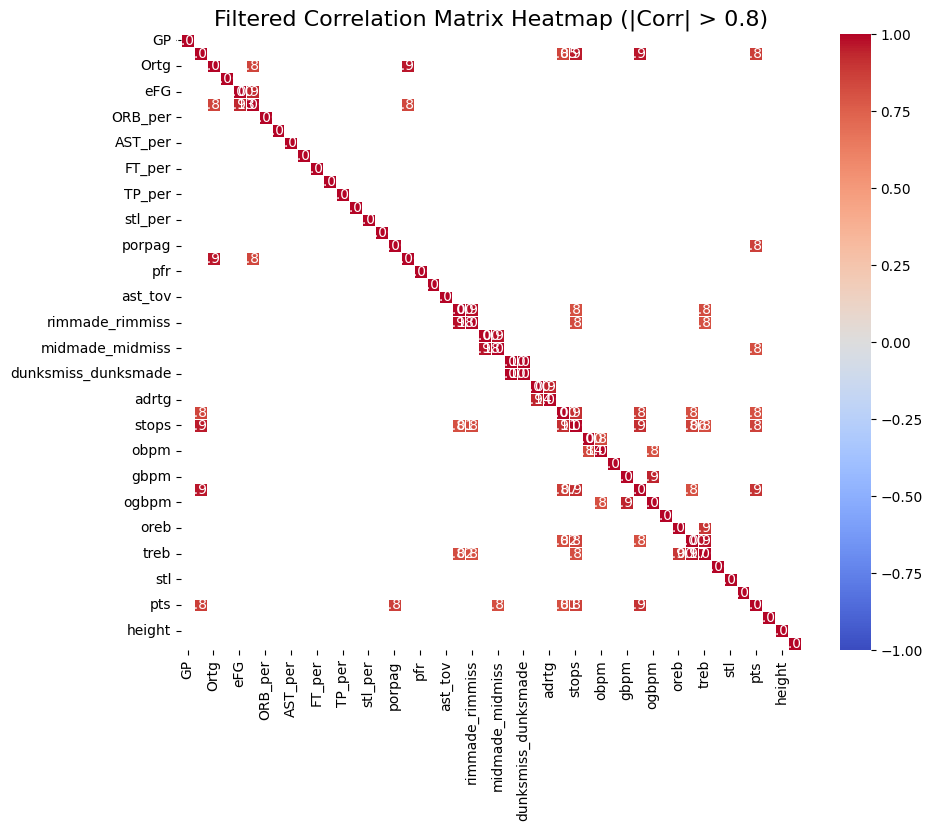

In [29]:
# Plotting the correlation between the columns to help decide to drop more columns that are strongly correlated 
draw_corrmatrix_numcols(df_train_cleaned,0.8)

In [30]:
# Drop the more columns
columns_to_drop_new = ['Ortg','Min_per','mp','dreb', 'oreb','drtg','ogbpm','obpm','eFG','TS_per']
df_train_cleaned.drop(columns=columns_to_drop_new, inplace=True)
df_test_cleaned.drop(columns=columns_to_drop_new, inplace=True)

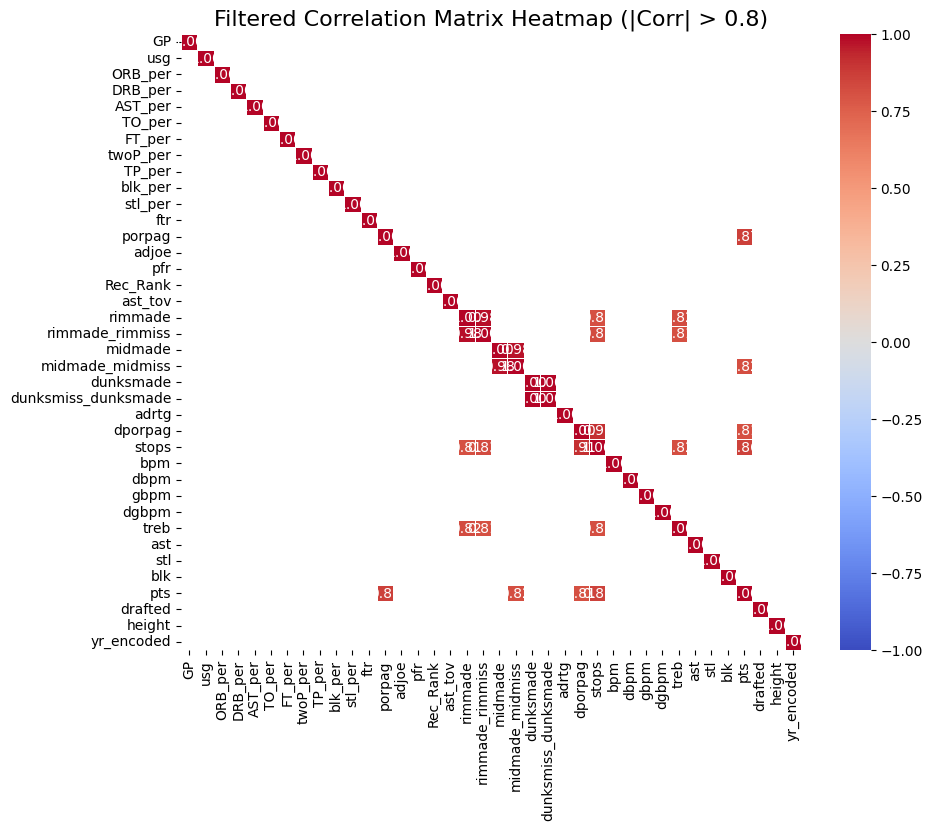

In [31]:
# Plotting the correlation between the columns to help decide to drop more columns that are strongly corelated 
draw_corrmatrix_numcols(df_train_cleaned,0.8)

## 3.2 Replacing null values in the dataset

In [32]:
# Print the columns with missing values in training data and test data

# Create instances of DataExplorer
explorer_cleaned = dataexplorer(df_train_cleaned, df_test_cleaned)

# Call the methods of the class to perform data exploration tasks
explorer_cleaned.calculate_missing_percentage()

Percentage of missing values in each column in traning data:
Rec_Rank               69.245785
ast_tov                 7.437041
rimmade                12.351452
rimmade_rimmiss        12.351452
midmade                12.351452
midmade_midmiss        12.351452
dunksmade              12.351452
dunksmiss_dunksmade    12.351452
adrtg                   0.090094
dporpag                 0.090094
stops                   0.090094
bpm                     0.090094
dbpm                    0.090094
gbpm                    0.090094
dgbpm                   0.090094
treb                    0.077223
ast                     0.077223
stl                     0.077223
blk                     0.077223
pts                     0.077223
height                  0.703591
dtype: float64
Percentage of missing values in each column in test data:
Rec_Rank               71.146881
ast_tov                10.804829
rimmade                 4.989940
rimmade_rimmiss         4.989940
midmade                 4.989940
midmade_

In [33]:
# List of columns that contain ratios and their missing value treatment for train data
columns_to_fill = ['ast_tov','adrtg','dporpag','bpm','dbpm','gbpm','dgbpm','treb','ast','stl','blk','pts','stops','rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss','dunksmade', 'dunksmiss_dunksmade','height']

# Replace missing values with the median of non-missing values in each column in training data
for column in columns_to_fill:
    median_value = df_train_cleaned[column].median()
    df_train_cleaned[column] = df_train_cleaned[column].fillna(median_value)

# Replace missing values with the median of non-missing values in each column in test data
for column in columns_to_fill:
    median_value = df_test_cleaned[column].median()
    df_test_cleaned[column] = df_test_cleaned[column].fillna(median_value)

# Replace missing values of Rec_Rank with 0 
df_train_cleaned['Rec_Rank'] = df_train_cleaned['Rec_Rank'].fillna(0.0)
df_test_cleaned['Rec_Rank'] = df_test_cleaned['Rec_Rank'].fillna(0.0)

In [34]:
# Print the columns with missing values in training data and test data

# Create instances of DataExplorer
explorer_cleaned = dataexplorer(df_train_cleaned, df_test_cleaned)

# Call the methods of the class to perform data exploration tasks
explorer_cleaned.calculate_missing_percentage()

Percentage of missing values in each column in traning data:
Series([], dtype: float64)
Percentage of missing values in each column in test data:
Series([], dtype: float64)


## 3.3 Target variable extraction

In [35]:
#Extract the column `drafted` and save it into a dataframe called `target`
target = df_train_cleaned.pop('drafted')

In [36]:
#Understanding the target variable - 'drafted
target.value_counts()

drafted
0.0    46174
1.0      444
Name: count, dtype: int64

## 3.4. Visualisations to understand the features better

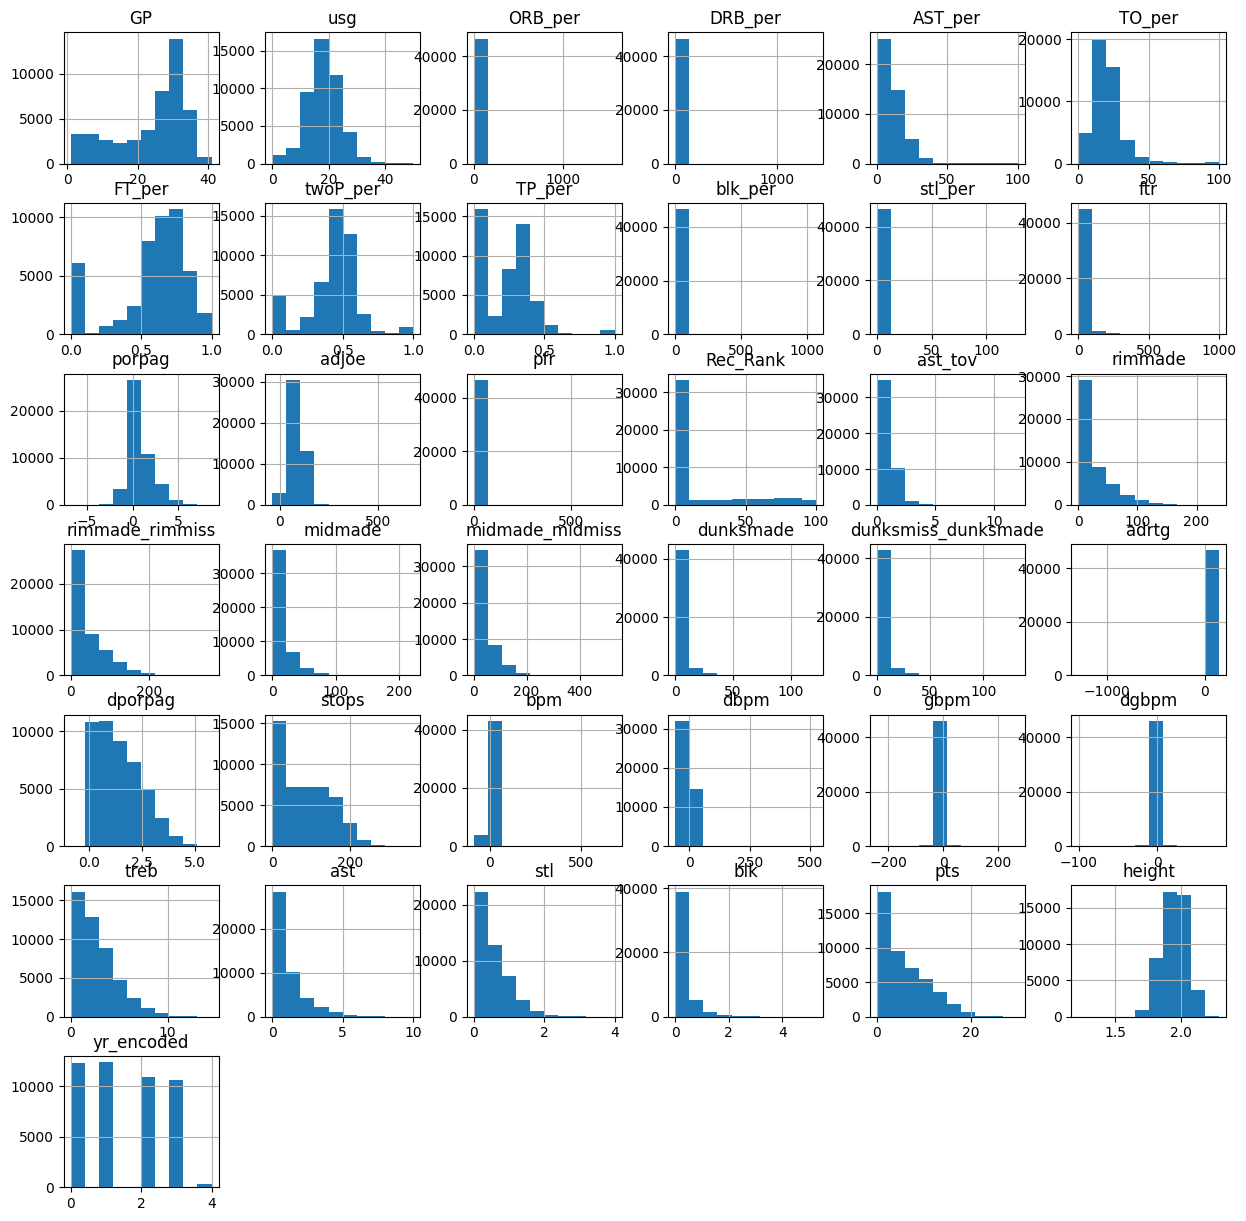

In [37]:
# Distribution of data across features and outliers identification
# plot histograms for all numeric columns

draw_histogram_numcols(df_train_cleaned)

# 4. Scaling data and storing cleaned data in interim data folder

In [38]:
# 4.1 Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [39]:
# 4.2 Instantiate the StandardScaler
scaler = StandardScaler()

In [40]:
# 4.3 Fit and apply the scaling on df and add the results into test and training datasets
df_train_cleaned_scaled = df_train_cleaned.copy()
df_test_cleaned_scaled = df_test_cleaned.copy()

# Fit and apply the scaling
df_train_scaled = scaler.fit_transform(df_train_cleaned)
df_test_scaled = scaler.transform(df_test_cleaned)

# Convert the scaled data back to DataFrames
df_train_cleaned_scaled = pd.DataFrame(df_train_scaled, columns=df_train_cleaned.columns)
df_test_cleaned_scaled = pd.DataFrame(df_test_scaled, columns=df_test_cleaned.columns)

# Display the scaled DataFrames
print("Scaled Training DataFrame:")
print(df_train_cleaned_scaled.head())

print("\nScaled Test DataFrame:")
print(df_test_cleaned_scaled.head())

Scaled Training DataFrame:
         GP       usg   ORB_per   DRB_per   AST_per    TO_per    FT_per  \
0  0.243831 -0.253090 -0.406020 -0.722319  0.517183 -0.346907  0.505951   
1  1.037740 -0.528085 -0.185687 -0.568347  0.283883 -0.060269  0.329553   
2  0.343069  0.588074 -0.355944 -0.414375  0.400533 -0.379665  0.348319   
3  0.640785 -0.350147 -0.155642 -0.287575  0.294488  0.267317 -0.225915   
4  0.938501  0.620426  0.264993  0.545686 -0.288763  0.177231 -0.068282   

   twoP_per    TP_per   blk_per  ...      dbpm      gbpm     dgbpm      treb  \
0 -0.223923  0.565189 -0.251475  ... -0.623973 -0.261603 -0.447411 -0.876985   
1  0.372379  0.873321 -0.139854  ... -0.039527  0.271169  0.065326 -0.336069   
2  0.011460  0.523409 -0.299312  ... -0.091448  0.387441 -0.127033  0.151544   
3 -0.145462  1.186675 -0.171746  ...  0.032358  0.218646  0.021259 -0.244397   
4  0.539762 -1.173926  0.003658  ...  0.164960  0.023874 -0.061974  0.993484   

        ast       stl       blk       pts

In [41]:
# Print the shapes
print("Shape of df_train_cleaned_scaled:", df_train_cleaned_scaled.shape)
print("Shape of df_test_cleaned_scaled:", df_test_cleaned_scaled.shape)
print("Shape of playerid_col:", playerid_col.shape)

Shape of df_train_cleaned_scaled: (46618, 37)
Shape of df_test_cleaned_scaled: (4970, 37)
Shape of playerid_col: (4970,)


In [42]:
# conversion if playerid_col is a NumPy array
if isinstance(playerid_col, np.ndarray):
    playerid_col = pd.Series(playerid_col)

print(type(df_test_cleaned_scaled))
print(type(playerid_col))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
# 4.4 add back the 'player_id' column to the test dataset 
df_test_cleaned_scaled.insert(1, 'player_id', playerid_col)
df_test_cleaned.insert(1, 'player_id', playerid_col)

In [44]:
# Print the shapes
print("Shape of df_train_cleaned:", df_train_cleaned.shape)
print("Shape of df_test_cleaned:", df_test_cleaned.shape)
print("Shape of df_train_cleaned_scaled:", df_train_cleaned_scaled.shape)
print("Shape of df_test_cleaned_scaled:", df_test_cleaned_scaled.shape)
print("Shape of target:", target.shape)

Shape of df_train_cleaned: (46618, 37)
Shape of df_test_cleaned: (4970, 38)
Shape of df_train_cleaned_scaled: (46618, 37)
Shape of df_test_cleaned_scaled: (4970, 38)
Shape of target: (46618,)


In [45]:
# 4.5 Import dump from joblib
from joblib import dump

# 4.6 Save the scaler model into the folder models - scaler.joblib
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [46]:
# 4.7 Saving the interim processed data
# Training data
df_train_cleaned_scaled.to_parquet('../data/interim/train_cleaned_scaled.parquet', index=False, engine='pyarrow')
df_train_cleaned.to_parquet('../data/interim/train_cleaned.parquet', index=False, engine='pyarrow')

# Testing data
df_test_cleaned_scaled.to_parquet('../data/processed/X_test_scaled.parquet', index=False, engine='pyarrow')
df_test_cleaned.to_parquet('../data/processed/X_test.parquet', index=False, engine='pyarrow')

# Saving the target Series as a Parquet file
target.to_frame().to_parquet('../data/interim/target.parquet', index=False, engine='pyarrow')

# 5. Split the training dataset

## 5.1 Load the training, target and test dataset into a dataframes called df_train and df_target

In [47]:
# Load the Parquet files into DataFrames 
# (Note:choose scaled or non scaled file based on the algorithm chosen)
df_train = pd.read_parquet('../data/interim/train_cleaned_scaled.parquet')
df_target = pd.read_parquet('../data/interim/target.parquet')

## 5.2 Spliting the training data into train and validation datasets

In [48]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#Split the features and target variable into 2 different sets (training and validation) with 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(df_train, df_target, test_size=0.2, random_state=42)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (37294, 37)
Shape of X_val: (9324, 37)
Shape of y_train: (37294, 1)
Shape of y_val: (9324, 1)


## 5.3 Saving the split dataset in the interim processed data

In [49]:
# Training data
X_train.to_parquet('../data/processed/X_train.parquet', index=False, engine='pyarrow')
y_train.to_parquet('../data/processed/y_train.parquet', index=False, engine='pyarrow')

# Validation data
X_val.to_parquet('../data/processed/X_val.parquet', index=False, engine='pyarrow')
y_val.to_parquet('../data/processed/y_val.parquet', index=False, engine='pyarrow')

# 6. Apply SMOTE on the training dataset

## 6.1 Initialize SMOTE and apply smote to training dataset

In [50]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define class distribution
def class_distribution(y):
    return np.sum(y, axis=0)
    
# Check the number of samples in each class after resampling
print("Before SMOTE:")
print("Class distribution in training data:", class_distribution(y_train))

print("After SMOTE:")
print("Class distribution in resampled training data:", class_distribution(y_train_resampled))

Before SMOTE:
Class distribution in training data: drafted    342.0
dtype: float64
After SMOTE:
Class distribution in resampled training data: drafted    36952.0
dtype: float64


# 6.2 Saving the interim processed data

In [51]:
# Training data - SMOTE resampled
X_train_resampled.to_parquet('../data/processed/X_train_resampled.parquet', index=False, engine='pyarrow')
y_train_resampled.to_parquet('../data/processed/y_train_resampled.parquet', index=False, engine='pyarrow')